## Convert video into images in every 1 seconds

In [ ]:
import cv2 as cv
import os
from time import time

def convert_video_to_image(output_folder,input_folder,file,seconds=1):
    file_folder = input_folder+file
    file_name =file[:-4] 
    print('File_name:', file)
    if not os.path.isfile(file_folder):
        print("File not found!")
    #print('file:', file)
    # create folder for saving images per videos
    folder_name = base=os.path.basename(file) + "frames"
    folder_path = os.path.join(output_folder,folder_name)
    #print(folder_path)
    if not os.path.exists(folder_path):
        os.mkdir(folder_path)

    cap = cv.VideoCapture(input_folder+file)
    total_frame = int(cap.get(cv.CAP_PROP_FRAME_COUNT))

    # save frame every # seconds
    seconds = 1
    fps = cap.get(cv.CAP_PROP_FPS) # Gets the frames per second
    # calculates number of frames that creates # seconds of video
    multiplier = fps * seconds

    # Check if video opened successfully
    if (cap.isOpened()== False):
        print("Error opening video stream or file")

    frame_counter = 1
    n=1
    while frame_counter <= total_frame:
        cap.set(cv.CAP_PROP_POS_FRAMES, frame_counter)
        ret, frame = cap.read()
        file_path = os.path.join(folder_path, str(file_name)+'_'+str(n)+".jpg")
        #print(file_path)
        cv.imwrite(file_path, frame)
        frame_counter += multiplier
        n=n+1

In [ ]:
# path of video saved folder
input_folder = 'videos/'
output_folder = 'output'
if not os.path.exists(output_folder):
    os.mkdir(output_folder)
video_list = [file for file in os.listdir(input_folder)]
print(len(video_list))
#print(video_list)
# save frame every # seconds
# you can change time you want
seconds = 1
for file in video_list:
    convert_video_to_image(output_folder,input_folder,file,seconds)

## Rotate image into different angle

In [ ]:
## opencv rotation methods (better than pillow)

In [18]:
import cv2
import os
import matplotlib.pyplot as plt
def rotate(angle,input_folder,output_folder,file):
    image = cv2.imread(input_folder+file)
    angle = angle
    # Rotate image to deskew
    (h, w) = image.shape[:2]
    center = (w // 2, h // 2)
    M = cv2.getRotationMatrix2D(center, angle, 1.0)
    rotated = cv2.warpAffine(image, M, (w, h), flags=cv2.INTER_CUBIC, borderMode=cv2.BORDER_REPLICATE)
    new_filename = file[:-4]+'_'+str(angle)+'.jpg'
    cv2.imwrite(output_folder+new_filename,rotated)
    imgplot = plt.imshow(cv2.cvtColor(rotated, cv2.COLOR_BGR2RGB))
    plt.show()

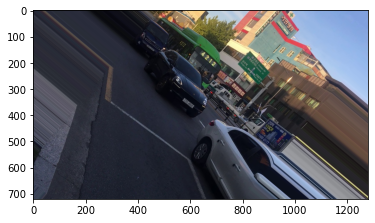

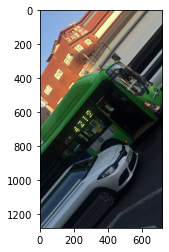

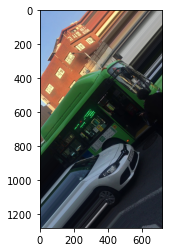

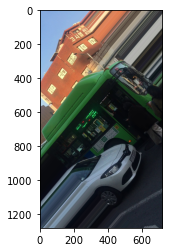

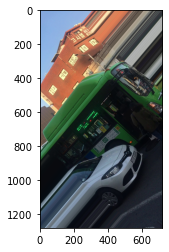

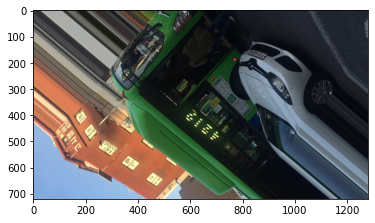

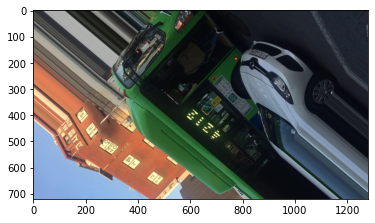

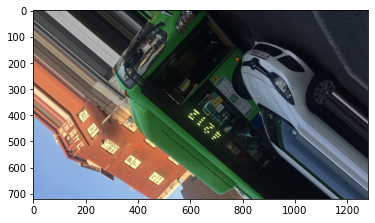

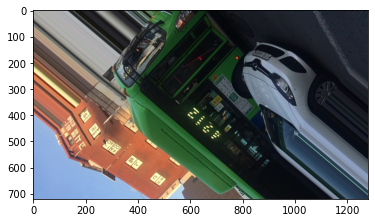

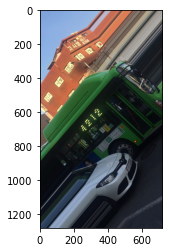

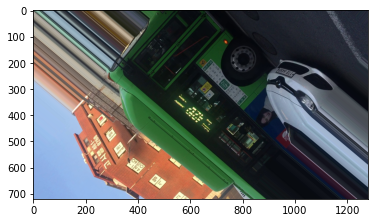

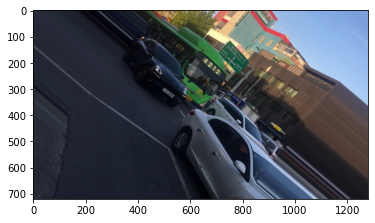

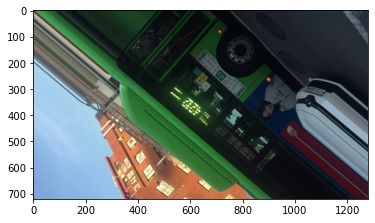

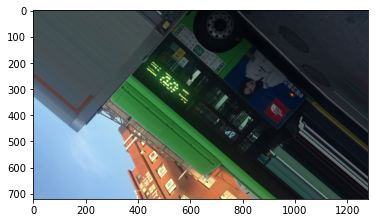

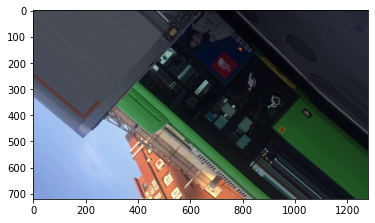

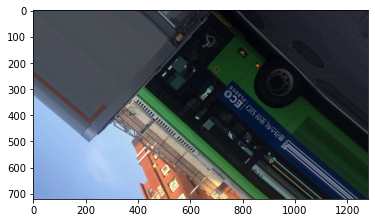

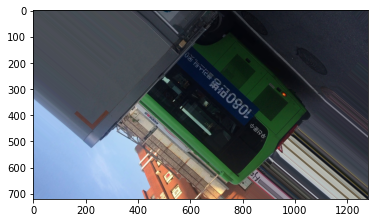

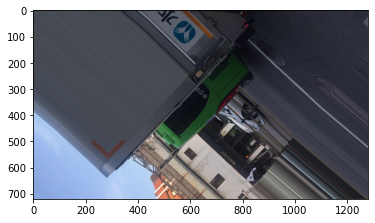

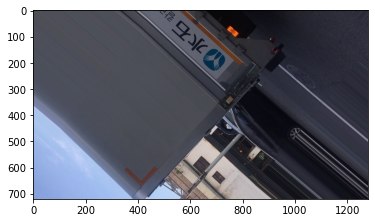

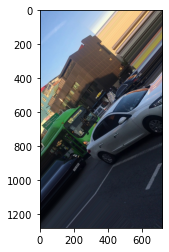

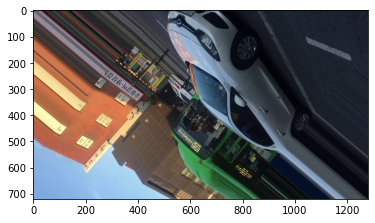

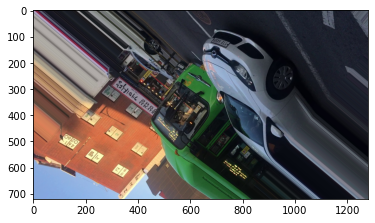

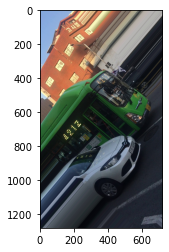

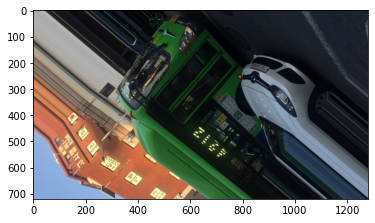

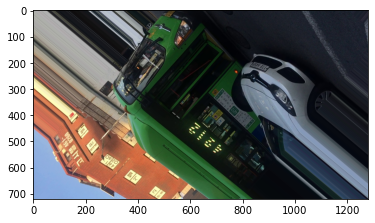

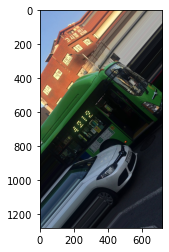

In [19]:
input_folder='input/'
output_folder ='output/'
if not os.path.exists(output_folder):
    os.mkdir(output_folder)
image_list =[file for file in os.listdir(input_folder) if file.endswith('.jpg')]
# change rotation angle you want
angle = 50
for file in image_list:
    rotate(angle,input_folder,output_folder,file)